In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
df = pd.read_csv("./data/heart_2022_no_nans.csv")
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [3]:
# number of rows / columns
df.shape

(246022, 40)

In [4]:
# columns
df.columns, len(df.columns)

(Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
        'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
        'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
        'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
        'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
        'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
        'DifficultyConcentrating', 'DifficultyWalking',
        'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
        'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
        'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
        'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
        'HighRiskLastYear', 'CovidPos'],
       dtype='object'),
 40)

In [5]:
# describe categorical
df.describe(include="object")

,State,Sex,GeneralHealth,LastCheckupTime,PhysicalActivities,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,...,ChestScan,RaceEthnicityCategory,AgeCategory,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
count,246022,246022,246022,246022,246022,246022,246022,246022,246022,246022,...,246022,246022,246022,246022,246022,246022,246022,246022,246022,246022
unique,54,2,5,4,2,4,2,2,2,2,...,2,5,13,2,2,2,2,4,2,3
top,Washington,Female,Very good,Within past year (anytime less than 12 months ...,Yes,None of them,No,No,No,No,...,No,"White only, Non-Hispanic",Age 65 to 69,Yes,No,Yes,No,"No, did not receive any tetanus shot in the pa...",No,No
freq,15000,127811,86999,198153,191318,131592,232587,231069,235910,209493,...,141822,186336,28557,135307,161520,131196,146130,81747,235446,167306


In [6]:
# describe numeric
df.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000
mean,4.119026,4.167140,7.021331,1.705150,83.615179,28.668136
std,8.405844,8.102687,1.440681,0.106654,21.323156,6.513973
min,0.000000,0.000000,1.000000,0.910000,28.120000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.270000
50%,0.000000,0.000000,7.000000,1.700000,81.650000,27.460000
75%,3.000000,4.000000,8.000000,1.780000,95.250000,31.890000
max,30.000000,30.000000,24.000000,2.410000,292.570000,97.650000


In [7]:
df.isnull().sum()

State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI     

In [8]:
# Check empty string
def is_empty(x):
    return x.eq('').any()

df.apply(lambda x: is_empty(x))

State                        False
Sex                          False
GeneralHealth                False
PhysicalHealthDays           False
MentalHealthDays             False
LastCheckupTime              False
PhysicalActivities           False
SleepHours                   False
RemovedTeeth                 False
HadHeartAttack               False
HadAngina                    False
HadStroke                    False
HadAsthma                    False
HadSkinCancer                False
HadCOPD                      False
HadDepressiveDisorder        False
HadKidneyDisease             False
HadArthritis                 False
HadDiabetes                  False
DeafOrHardOfHearing          False
BlindOrVisionDifficulty      False
DifficultyConcentrating      False
DifficultyWalking            False
DifficultyDressingBathing    False
DifficultyErrands            False
SmokerStatus                 False
ECigaretteUsage              False
ChestScan                    False
RaceEthnicityCategor

array([[<Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'WeightInKilograms'}>],
       [<Axes: title={'center': 'HeightInMeters'}>,
        <Axes: title={'center': 'SleepHours'}>],
       [<Axes: title={'center': 'MentalHealthDays'}>,
        <Axes: title={'center': 'PhysicalHealthDays'}>]], dtype=object)

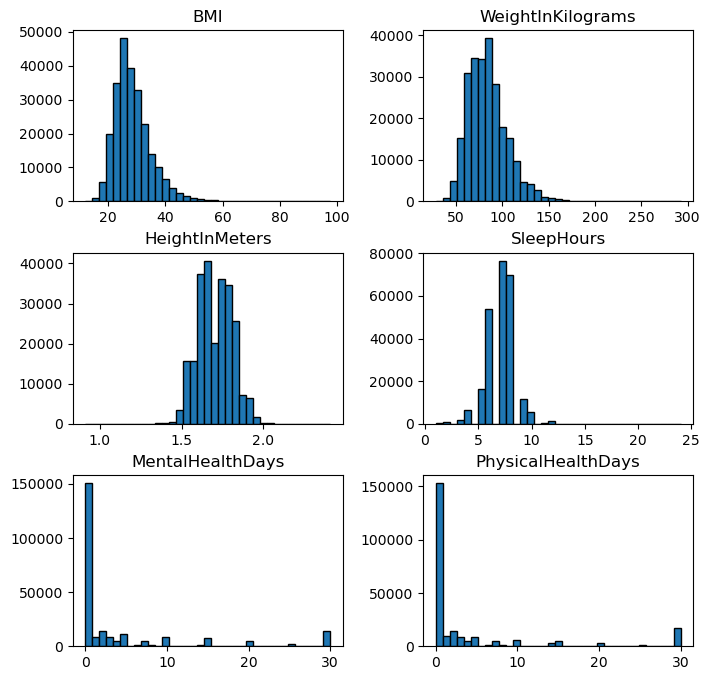

In [11]:
df[["BMI","WeightInKilograms","HeightInMeters", "SleepHours","MentalHealthDays", "PhysicalHealthDays"]].hist(bins=35, grid=False, edgecolor="black", figsize=(8,8))